# lab 2
## data
### Observations
 As the sample size increases, the empirical (sampled) distribution converges toward the theoretical Gamma distribution. This demonstrates the Law of Large Numbers.

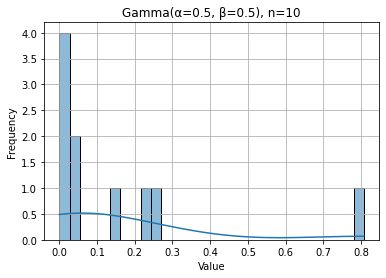

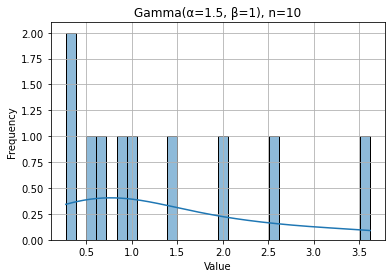

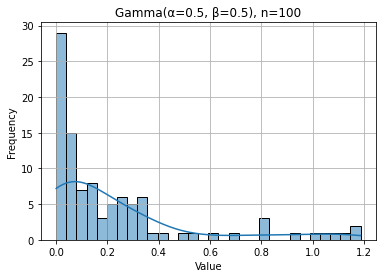

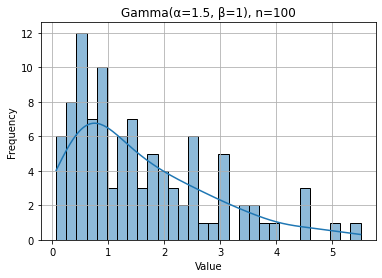

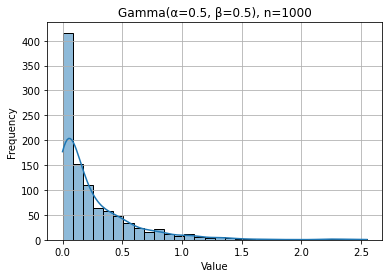

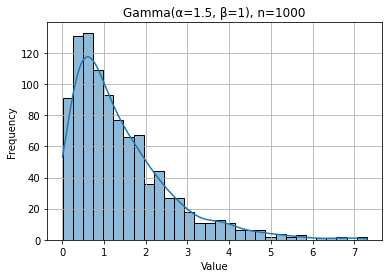

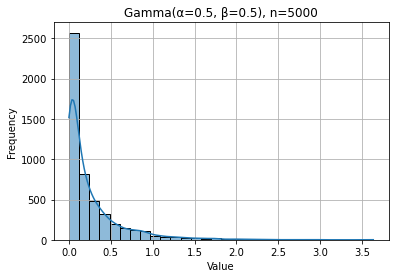

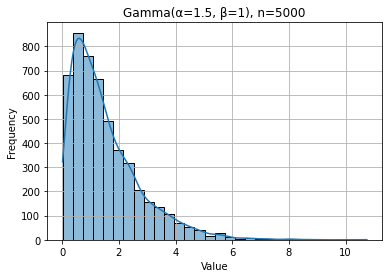

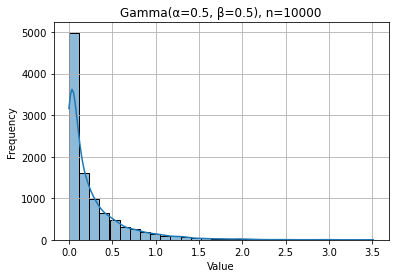

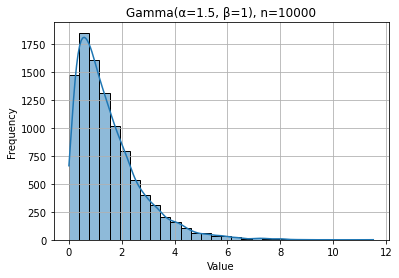


 Sample Size n = 10
n=10, α=0.5, β=0.5: [0.15321854563485515, 0.04231278356100415, 0.8072653129480187, 0.00788583510214907, 0.0013244365078044769]...
n=10, α=1.5, β=1: [2.5819342793654676, 0.3357218213084119, 3.620653660268476, 1.441482482846566, 1.9807001789034362]...
n=10, α=3, β=1: [1.4247042248088162, 1.3197809790152408, 0.7971900347631353, 3.8682131754480364, 1.8061881098761792]...
n=10, α=4, β=2: [11.072993881501064, 2.265992786681717, 12.124386377417183, 13.718843388656714, 5.040945789802659]...
n=10, α=6, β=2: [10.613533720592235, 22.018608913319934, 14.679454470335777, 12.561066949896215, 5.980001663320194]...

 Sample Size n = 100
n=100, α=0.5, β=0.5: [0.025926581666724756, 0.03493399201681301, 1.1668499035508797, 0.010554586071835143, 0.16359888649526985]...
n=100, α=1.5, β=1: [1.1598764241132367, 3.6546378701784734, 0.45658743572203286, 0.9265037785106004, 1.7879948613187142]...
n=100, α=3, β=1: [3.1103699992488902, 1.2924541397112228, 0.8438368748159785, 0.621947768930162

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3)
sample_sizes = [10, 100, 1000, 5000, 10000]

samples = {}
gamma_params = [
    (0.5, 0.5), (1.5, 1), (3, 1), (4, 2), (6, 2),
    (8, 3), (10, 3), (12, 4), (15, 4), (20, 5)
]
for n in sample_sizes:
    for i,(alpha,beta) in enumerate(gamma_params):
        key = f"n={n}, α={alpha}, β={beta}"
        data = np.random.gamma(shape=alpha,scale=beta,size=n)
        samples[key] = data
        
        
        if n in [10, 100, 1000,5000,10000] and i < 2:
            sns.histplot(data, kde=True, bins=30)
            plt.title(f"Gamma(α={alpha}, β={beta}), n={n}")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()
for n in sample_sizes:
    print(f"\n Sample Size n = {n}")
    count = 0
    for key in samples:
        if key.startswith(f"n={n},") and count < 5:
            print(f"{key}: {samples[key][:5].tolist()}...")
            count += 1


## MLE & MME
### Observations
The MLE method may require more computational resources, especially if the likelihood function is complex or the optimization algorithm struggles with the data.

The MME method is simpler and faster but may not always provide accurate estimates, particularly with smaller sample sizes or distributions with significant skewness or kurtosis

In [5]:
import numpy as np
from scipy.stats import gamma
from scipy.optimize import minimize
np.random.seed(3)
##data = np.random.gamma(samples)
def mle_estimation(data):
    def neg_log_likelihood(params):
        a, scale = params
        if a <= 0 or scale <= 0:
            return np.inf
        return -np.sum(gamma.logpdf(data, a=a, scale=scale)) ## minus because the function give me the min and i want the max
    
    result = minimize(neg_log_likelihood, [1.0, 1.0], bounds=[(1e-6, None), (1e-6, None)])
    return result.x if result.success else (np.nan, np.nan)
def mme_estimation(data):
    sample_mean = np.mean(data)
    sample_var = np.var(data)
    beta = sample_var / sample_mean
    alpha = sample_mean**2 / sample_var
    return alpha,beta


## tabulation
### Observations
 MLE provides more accurate estimation for small samples or extreme parameters values

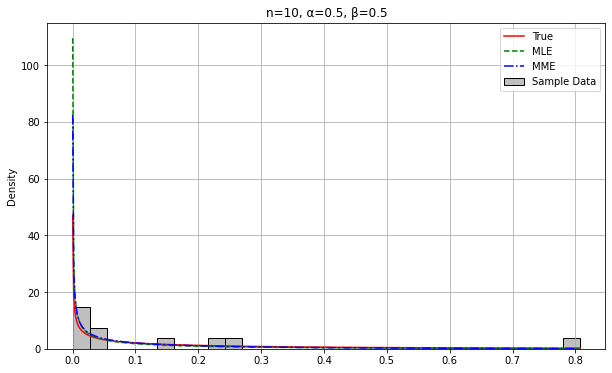

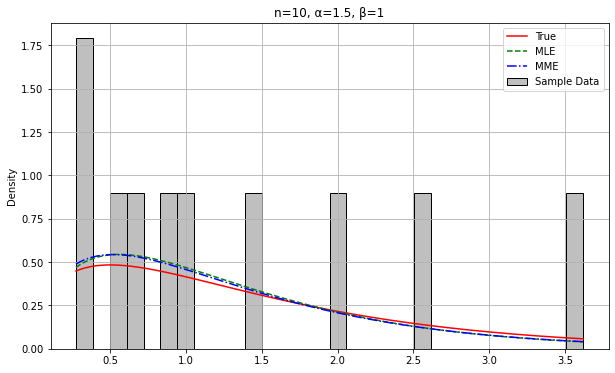

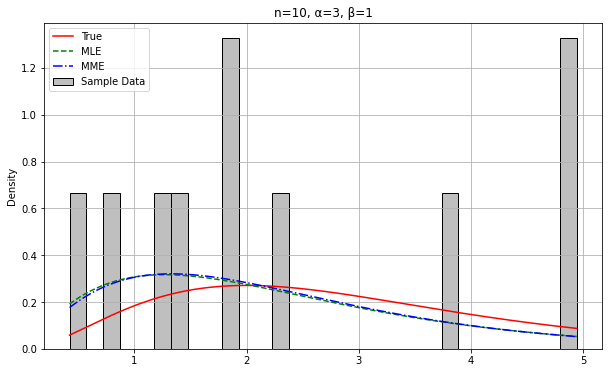

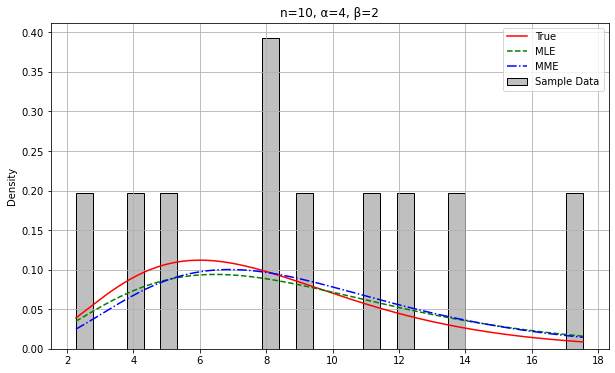

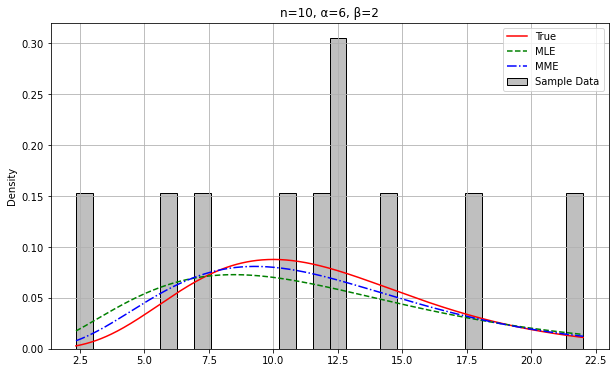

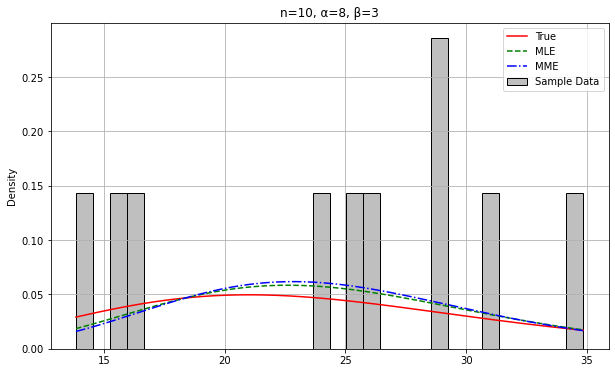

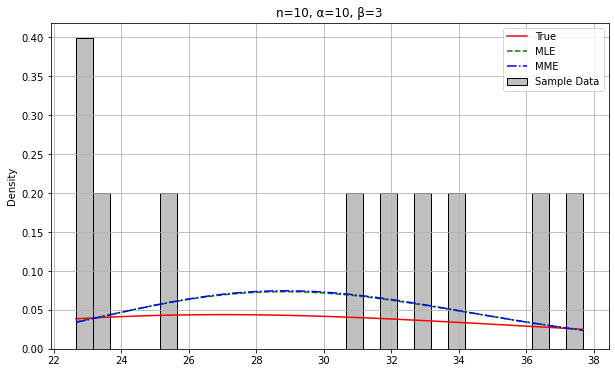

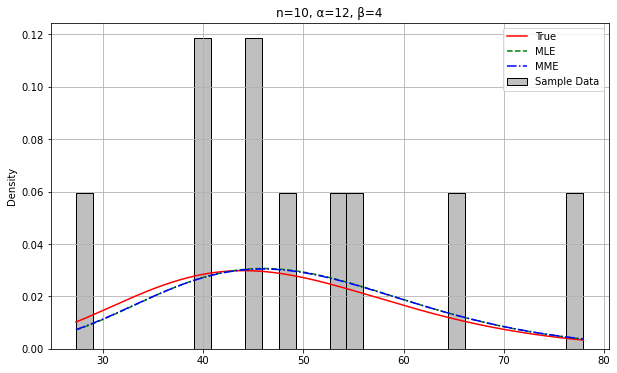

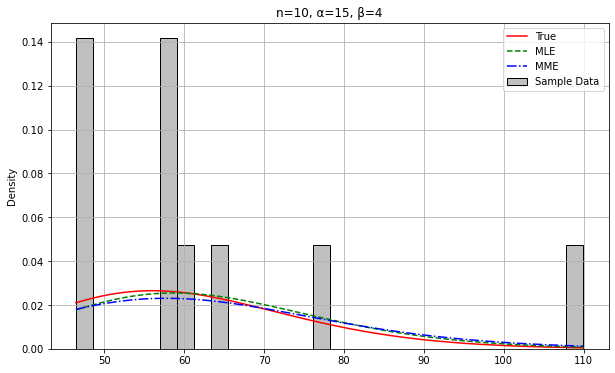

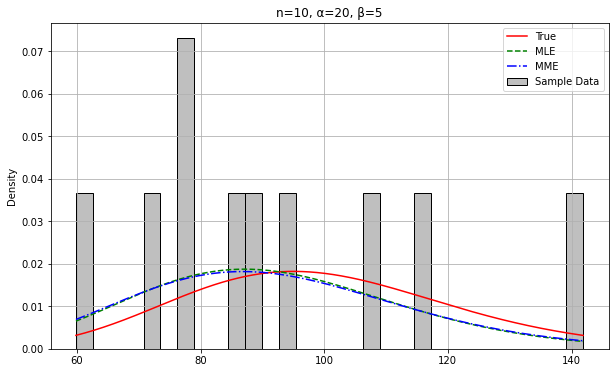

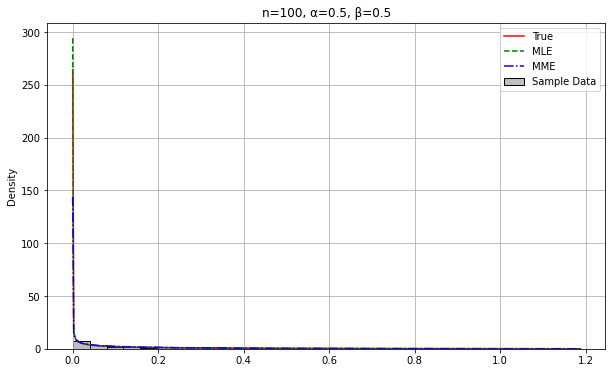

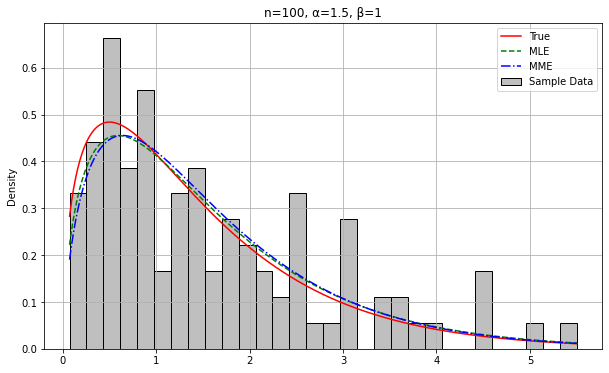

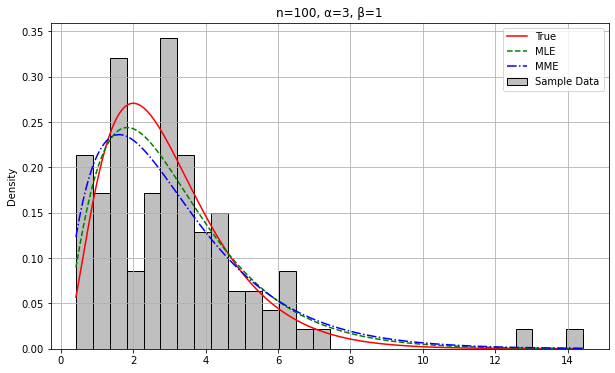

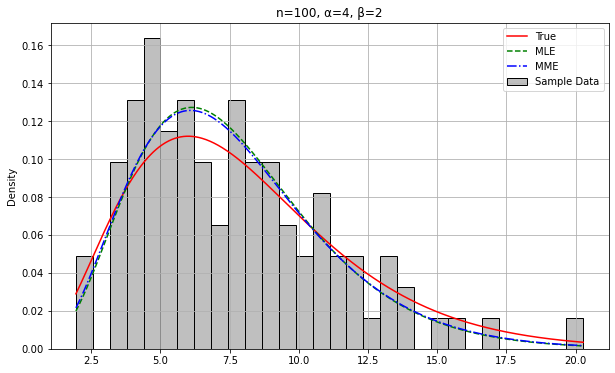

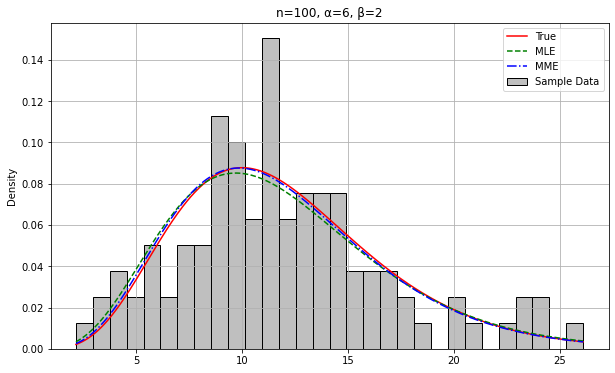

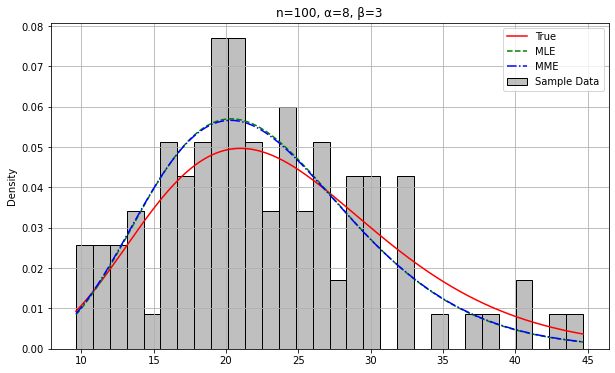

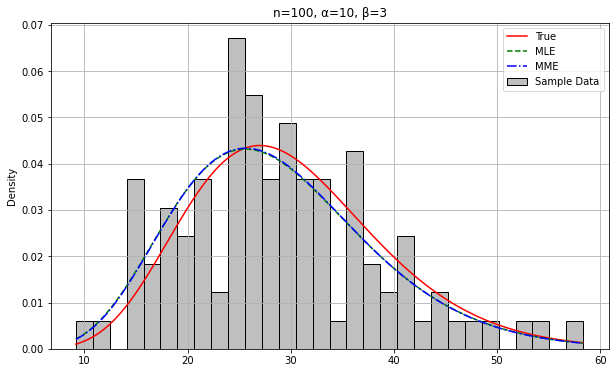

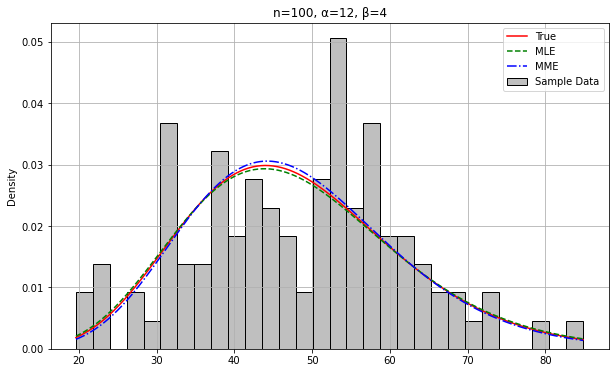

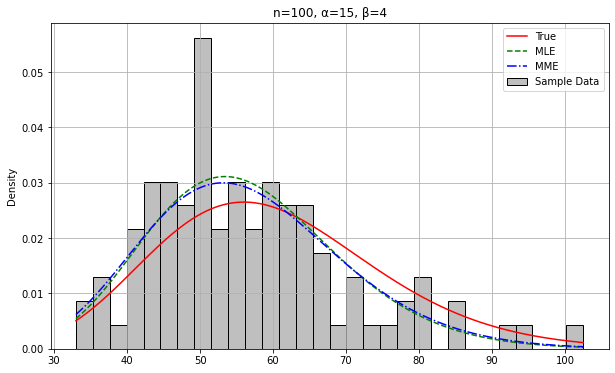

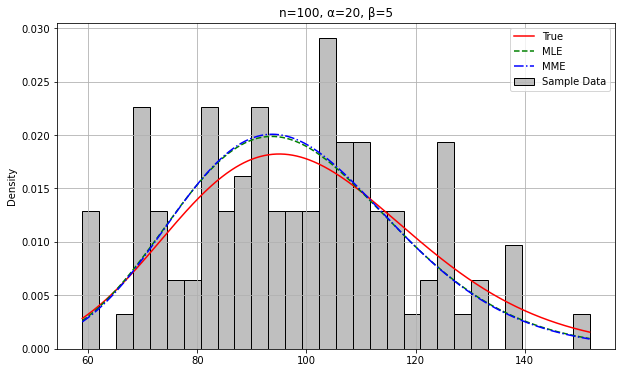

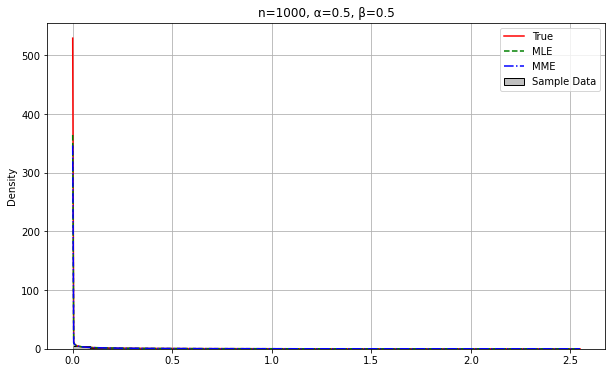

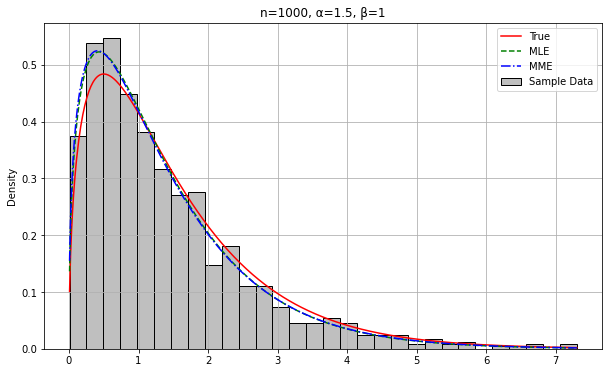

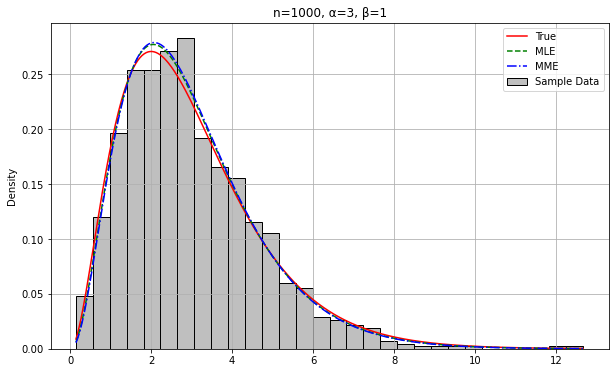

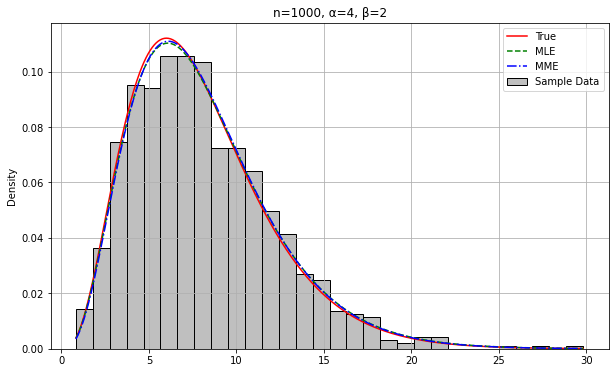

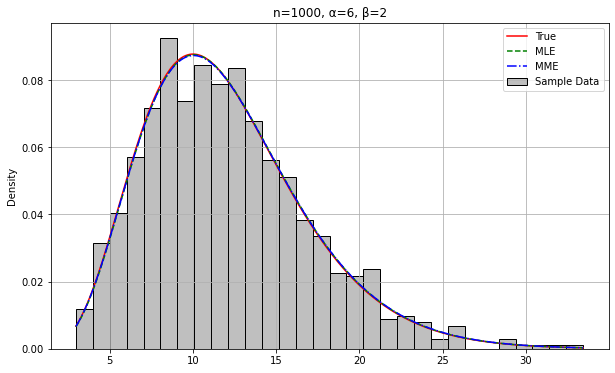

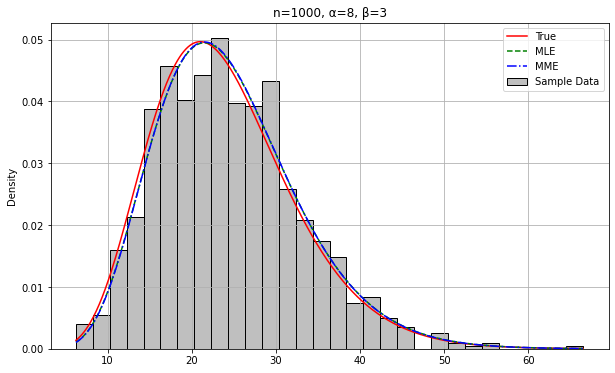

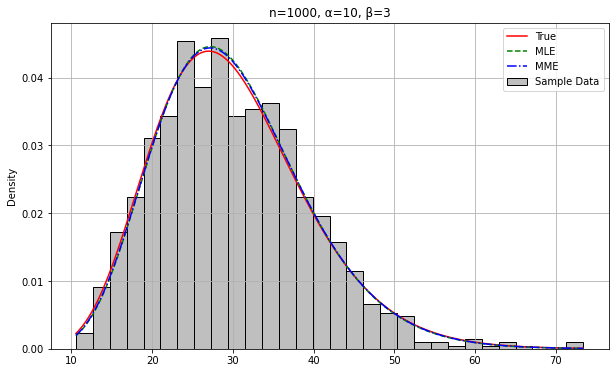

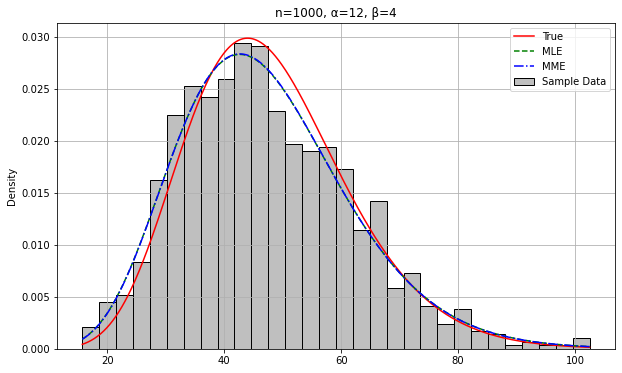

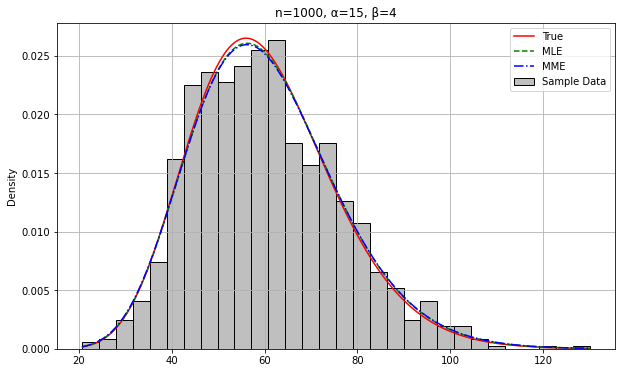

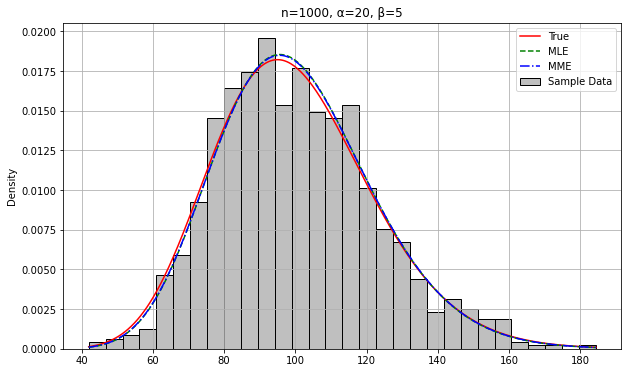

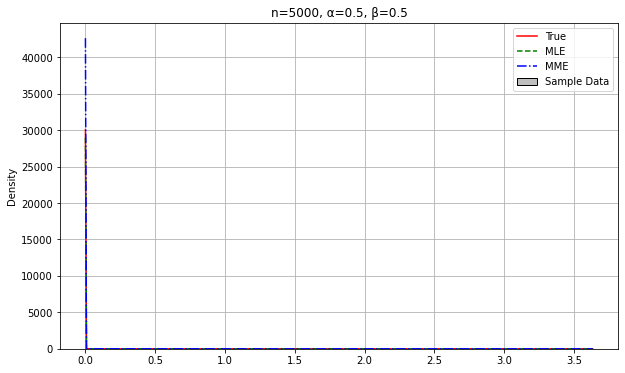

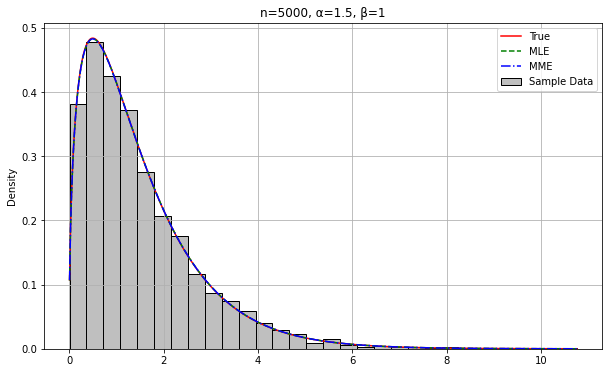

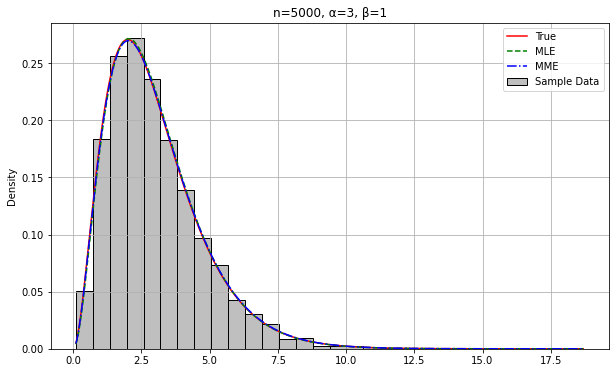

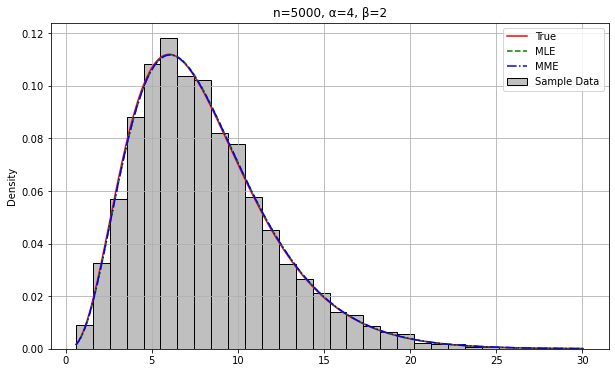

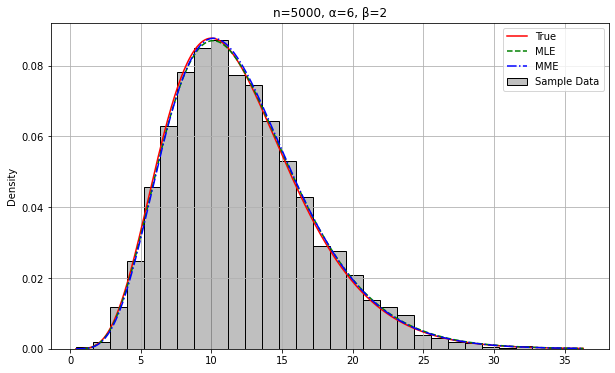

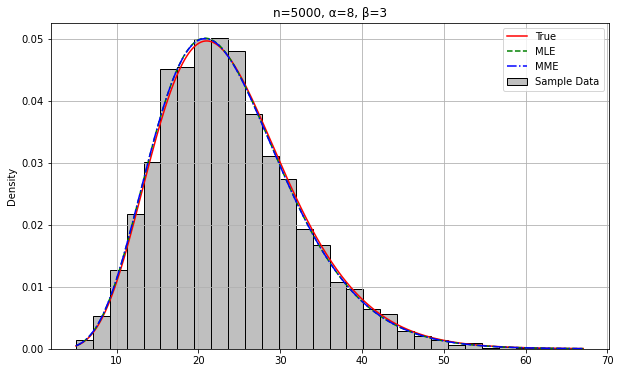

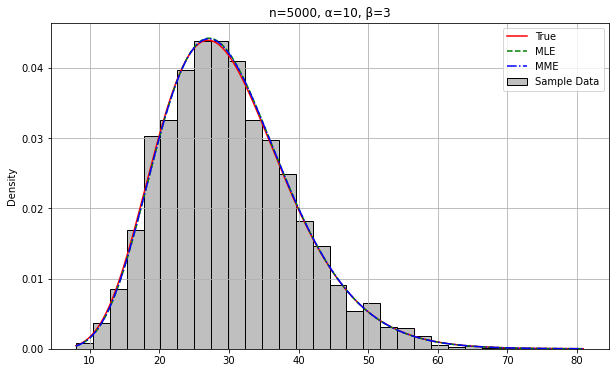

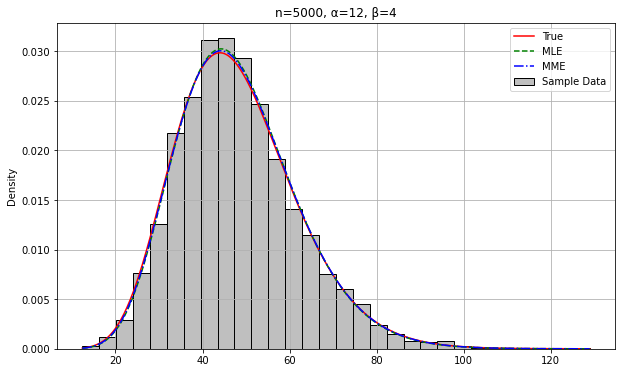

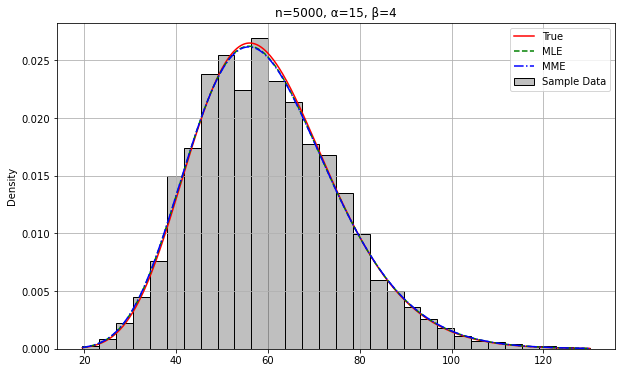

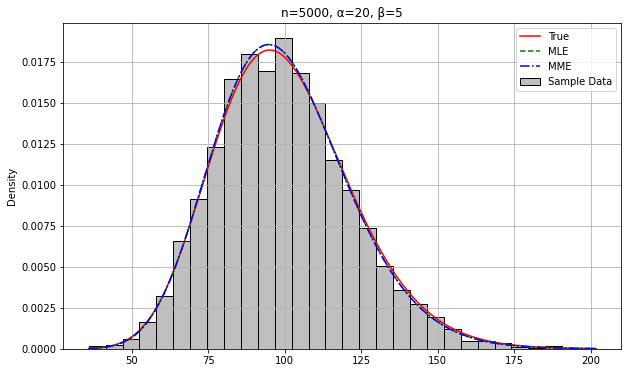

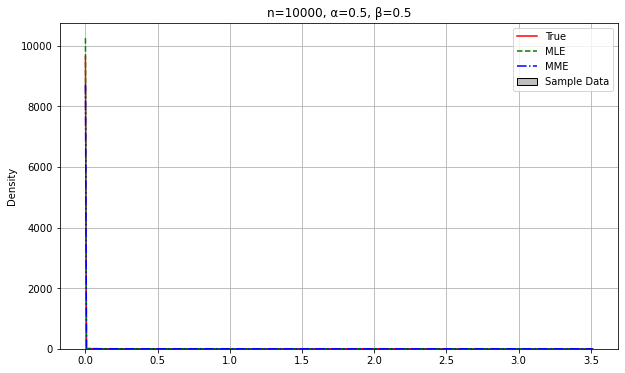

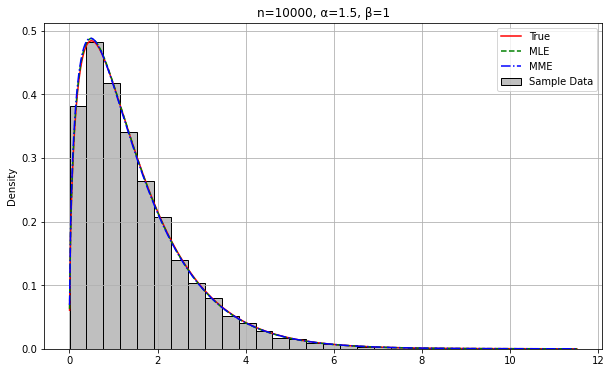

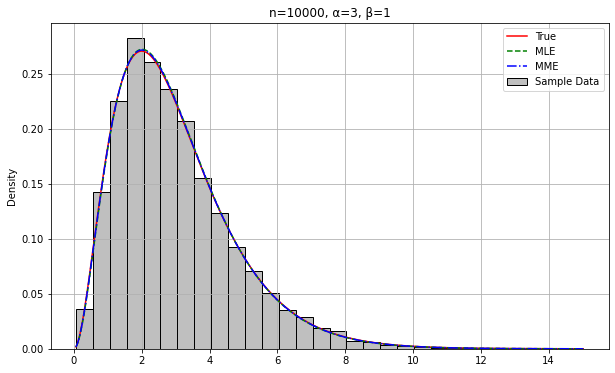

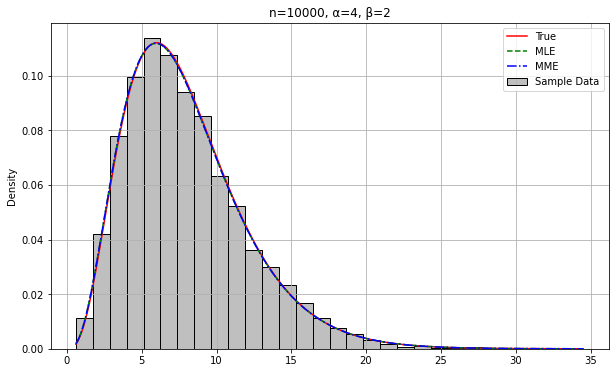

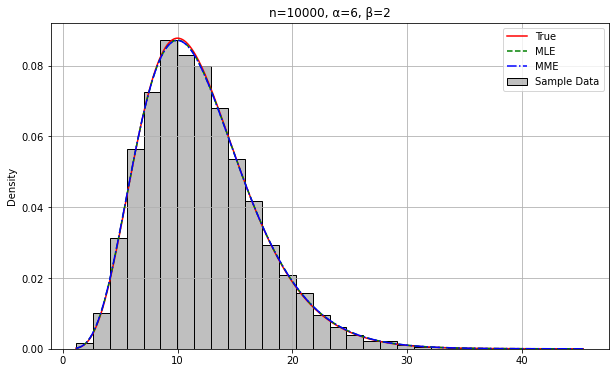

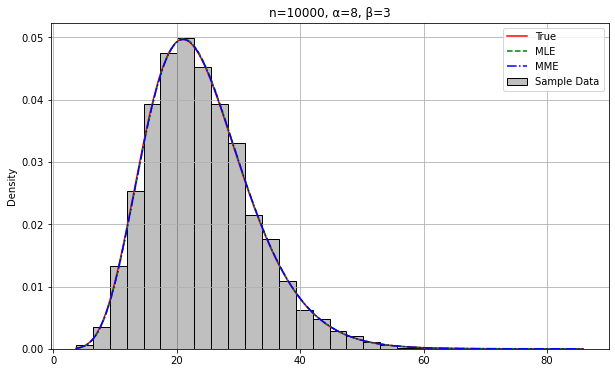

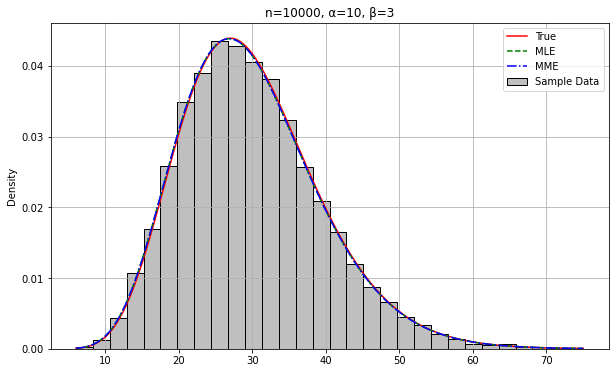

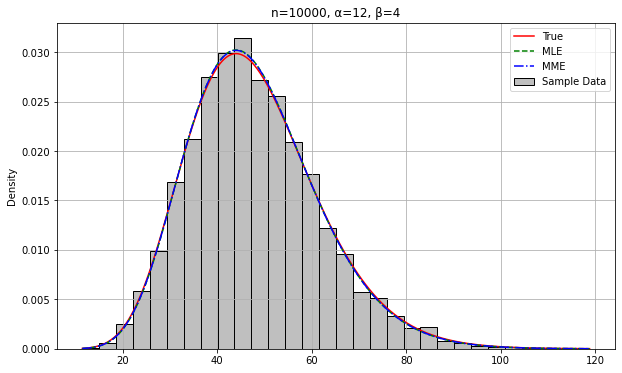

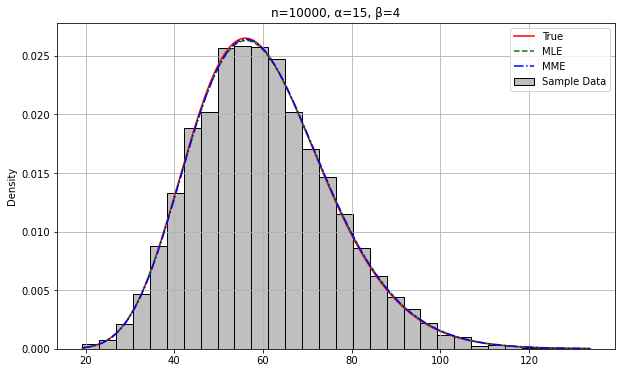

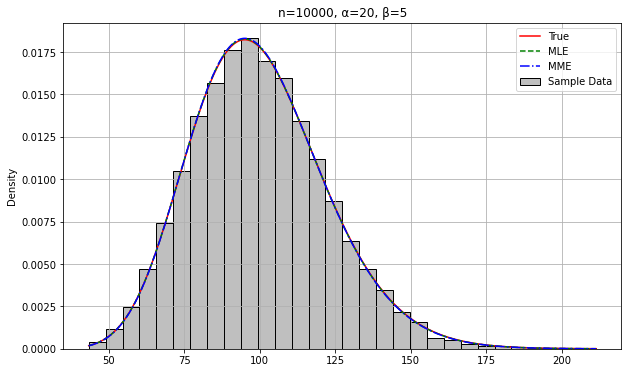

        n  True alpha  True beta  MLE alpha  MLE beta  MME alpha  MME beta
0      10         0.5        0.5      0.337     0.455      0.418     0.367
1      10         1.5        1.0      1.724     0.771      1.639     0.812
2      10         3.0        1.0      2.163     1.090      2.290     1.029
3      10         4.0        2.0      3.485     2.604      4.158     2.182
4      10         6.0        2.0      3.549     3.322      4.708     2.504
5      10         8.0        3.0     12.145     2.029     13.679     1.801
6      10        10.0        3.0     29.237     1.020     30.184     0.988
7      10        12.0        4.0     13.657     3.634     13.473     3.683
8      10        15.0        4.0     15.191     4.135     12.265     5.122
9      10        20.0        5.0     17.924     5.147     16.810     5.489
10    100         0.5        0.5      0.492     0.461      0.582     0.390
11    100         1.5        1.0      1.590     0.999      1.676     0.948
12    100         3.0    

In [6]:
import pandas as pd
import scipy.stats as stats
results1 = []
for n in sample_sizes:
    for alpha_true,beta_true in gamma_params:
        data = np.random.gamma(shape=alpha_true,scale=beta_true,size=n)
        alpha_mle,beta_mle = mle_estimation(data)
        alpha_mme,beta_mme = mme_estimation(data)
        results1.append({
            "n": n,
            "True alpha": round(alpha_true, 3),
            "True beta": round(beta_true, 3),
            "MLE alpha": round(alpha_mle, 3),
            "MLE beta": round(beta_mle, 3),
            "MME alpha": round(alpha_mme, 3),
            "MME beta": round(beta_mme, 3),
        })
        plt.figure(figsize=(10, 6))
       
        sns.histplot(data, stat="density", bins=30, color="gray", label="Sample Data", alpha=0.5)
        x = np.linspace(min(data), max(data), 500)
       
        plt.plot(x, stats.gamma.pdf(x, a=alpha_true, scale=beta_true), 'r-', label='True')
        
        plt.plot(x, stats.gamma.pdf(x, a=alpha_mle, scale=beta_mle), 'g--', label='MLE')
        
        plt.plot(x, stats.gamma.pdf(x, a=alpha_mme, scale=beta_mme), 'b-.', label='MME')
        plt.title(f"n={n}, α={alpha_true}, β={beta_true}")
        plt.legend()
        plt.grid(True)
        plt.show()
       
df_results = pd.DataFrame(results1)
print(df_results)       

